In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hs_d = pd.read_csv('Housing_data.csv')

In [3]:
hs_d.head()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag,locationbed,location,spec_location,description
0,850000.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,1.0,gbagada3,gbagada,sosanya soluyi gbagada lagos,3 bedroom Flat / Apartment for rent Sosanya So...
1,650000.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,400000.0,560000.0,9.0,560000.0,1.0,gbagada1,gbagada,millenuim ups gbagada lagos,1 bedroom mini flat Mini flat Flat / Apartment...
2,600000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,800000.0,1060000.0,26.0,1060000.0,1.0,gbagada2,gbagada,alapere gbagada lagos,"2bed at Alapere, all rooms ensuit ... ..."
3,1500000.0,3.0,3.0,4.0,1.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,2.0,gbagada3,gbagada,medina gbagada lagos,3 bedroom Flat / Apartment for rent Medina Gba...
4,1500000.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,2.0,gbagada3,gbagada,adeola atunrase medina gbagada lagos,3 bedroom House for rent Adeola Atunrase Medin...


# Exploratory Data Analysis

In [4]:
hs_d.isnull().sum()

price             0
bedrooms          0
bathrooms         0
toilets           0
estate_flag       0
terrace_flag      0
new_flag          0
serviced_flag     0
estate_price      0
serviced_price    0
location_rank     0
new_price         0
exec_flag         0
locationbed       0
location          0
spec_location     0
description       0
dtype: int64

In [5]:
hs_d.nunique()

price              130
bedrooms             5
bathrooms            7
toilets              8
estate_flag          2
terrace_flag         2
new_flag             2
serviced_flag        2
estate_price        33
serviced_price      40
location_rank       34
new_price           40
exec_flag            4
locationbed         47
location            10
spec_location     1965
description       3994
dtype: int64

# The Cateforical features for the Dataset

In [6]:
for i in hs_d.columns:
    if hs_d[i].nunique() <= 10:
        print ( 'count value for each category in each feature: {}'.format(hs_d.groupby(i)[i].count()), '\n')

print ('The number of Categorical feautures: {}'.format(len(hs_d.columns)))

count value for each category in each feature: bedrooms
1.0     855
2.0     941
3.0    1444
4.0     872
5.0     265
Name: bedrooms, dtype: int64 

count value for each category in each feature: bathrooms
0.0     457
1.0     745
2.0     803
3.0    1252
4.0     792
5.0     300
6.0      28
Name: bathrooms, dtype: int64 

count value for each category in each feature: toilets
0.0     465
1.0     622
2.0     477
3.0     868
4.0    1075
5.0     662
6.0     199
7.0       9
Name: toilets, dtype: int64 

count value for each category in each feature: estate_flag
0.0    1802
1.0    2575
Name: estate_flag, dtype: int64 

count value for each category in each feature: terrace_flag
0.0    3049
1.0    1328
Name: terrace_flag, dtype: int64 

count value for each category in each feature: new_flag
0.0    2038
1.0    2339
Name: new_flag, dtype: int64 

count value for each category in each feature: serviced_flag
0.0    2602
1.0    1775
Name: serviced_flag, dtype: int64 

count value for each category i

In [7]:
hs_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           4377 non-null   float64
 1   bedrooms        4377 non-null   float64
 2   bathrooms       4377 non-null   float64
 3   toilets         4377 non-null   float64
 4   estate_flag     4377 non-null   float64
 5   terrace_flag    4377 non-null   float64
 6   new_flag        4377 non-null   float64
 7   serviced_flag   4377 non-null   float64
 8   estate_price    4377 non-null   float64
 9   serviced_price  4377 non-null   float64
 10  location_rank   4377 non-null   float64
 11  new_price       4377 non-null   float64
 12  exec_flag       4377 non-null   float64
 13  locationbed     4377 non-null   object 
 14  location        4377 non-null   object 
 15  spec_location   4377 non-null   object 
 16  description     4377 non-null   object 
dtypes: float64(13), object(4)
memory 

# Correlation 

examining the dpendent relationship with the numerical features of the dataset

In [8]:
corr_hsd = hs_d.corr()

In [9]:
corr_hsd
#.groupby('price').sum()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag
price,1.000000,0.657021,0.447772,0.461837,0.249855,0.697134,0.163079,0.349731,0.821092,0.816925,0.792509,0.816925,0.694552
bedrooms,0.657021,1.000000,0.675825,0.666456,0.011875,0.625976,0.051302,0.071721,0.745899,0.732251,0.829569,0.732251,0.428395
bathrooms,0.447772,0.675825,1.000000,0.945059,0.028160,0.426519,0.156822,0.090400,0.504016,0.494629,0.555994,0.494629,0.284639
toilets,0.461837,0.666456,0.945059,1.000000,0.041909,0.413571,0.159559,0.135490,0.501710,0.496248,0.566172,0.496248,0.320637
estate_flag,0.249855,0.011875,0.028160,0.041909,1.000000,0.156250,0.214016,0.257895,-0.007466,-0.005909,0.005035,-0.005909,0.223545
terrace_flag,0.697134,0.625976,0.426519,0.413571,0.156250,1.000000,0.128857,0.158359,0.642534,0.622621,0.624647,0.622621,0.500956
new_flag,0.163079,0.051302,0.156822,0.159559,0.214016,0.128857,1.000000,0.253236,-0.002975,-0.009811,-0.004003,-0.009811,0.105489
serviced_flag,0.349731,0.071721,0.090400,0.135490,0.257895,0.158359,0.253236,1.000000,0.169583,0.176223,0.194179,0.176223,0.373014
estate_price,0.821092,0.745899,0.504016,0.501710,-0.007466,0.642534,-0.002975,0.169583,1.000000,0.991465,0.934464,0.991465,0.552332
serviced_price,0.816925,0.732251,0.494629,0.496248,-0.005909,0.622621,-0.009811,0.176223,0.991465,1.000000,0.938154,1.000000,0.566417


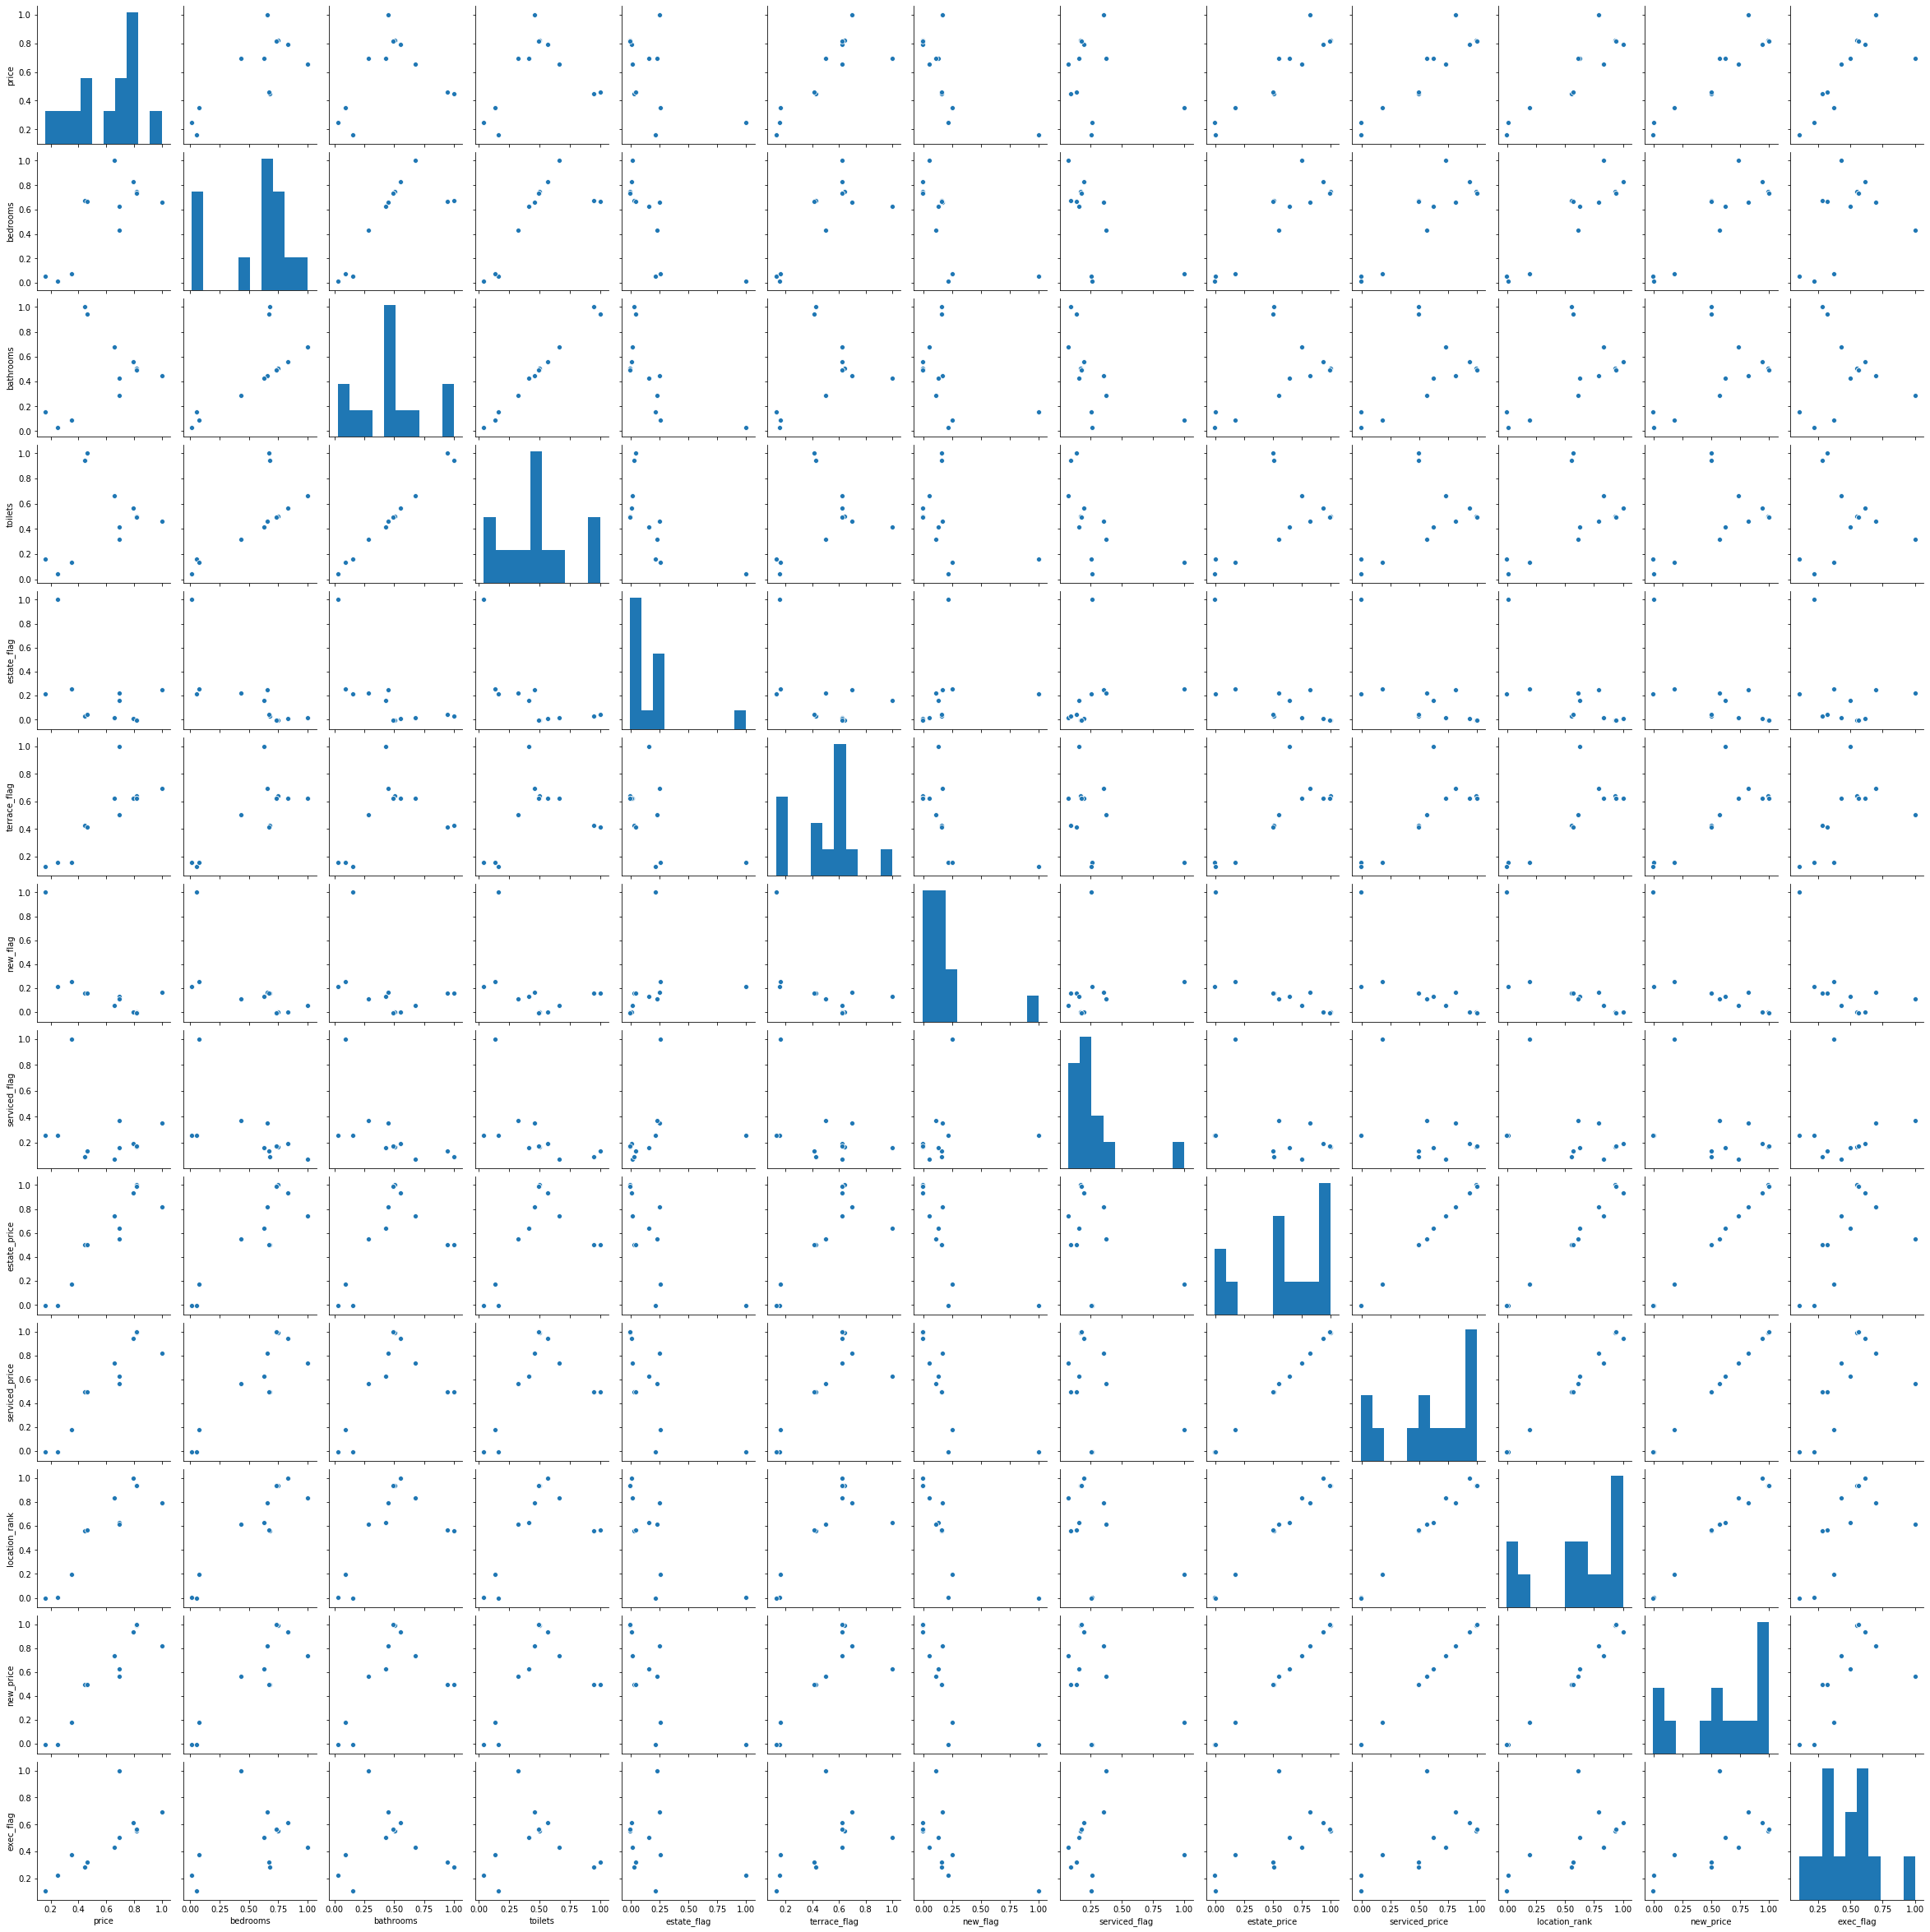

In [10]:
sns.pairplot(corr_hsd)

# Using the correlated plot and values 

1. Finding out the features that have a strong positive correlation with each other
2. ...............................................a strong negative correlation with each other 

From observation 

The feature columns (estate price, serviced price, location rank, new price) have a high correlation with each other.

The feature columns (bedrooms, bathrooms, toilets) have a high correlation with each other.


Further realtions can be gottern individually to get a better understanding of the Data set 

# Possible models and tagert vairables to predict

Target variables
1. Price of an Apartment (Regression)
2. Location of an Apartment (Classfication)
3. Using the Description column to gauge NLP

Feature Columns that should be dropped due to lack of correlation or irrelevance for Regression and Classification 

1. Description
2. Specific Location
3. Location Bed
4. Serviced price or New price

# Preprocessing 



In [11]:
hs_d.drop(['locationbed', 'spec_location', 'description', 'serviced_price'], axis = 1, inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

hs_d.location = lbl.fit_transform(hs_d.location)

In [13]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

s_hsd = pd.DataFrame( scl.fit_transform(hs_d), columns = hs_d.columns)


# Prediction Model 

In [14]:
X = s_hsd.drop(['price'], axis = 1)
y = s_hsd['price']
#y = np.array(s_hsd['price']).reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [16]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3063, 12) (1314, 12) (3063,) (1314,)


# Models to use
1. ElasticNET
2. Decisions Tree
3. RandomForest 

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import ElasticNet
from sklearn import model_selection
from sklearn.pipeline import Pipeline

In [18]:
elas = ElasticNet()
pipe = Pipeline
randf = RandomForestRegressor()
dcr = DecisionTreeRegressor()
grd = GridSearchCV

In [19]:
elas_param = {'alpha' : np.arange(0.01, 0.1, 0.01)}

elas_grd = grd(elas, param_grid = elas_param, cv = 10, n_jobs = -1, verbose = True, scoring = 'r2')

In [20]:
elas_grd.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  83 out of  90 | elapsed:    6.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.6s finished


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             scoring='r2', verbose=True)

In [21]:
randf_param = {'max_depth' : np.arange(100, 500, 50), 'min_samples_leaf': np.arange(10,50,5)}
randf_grd = grd(randf, randf_param, cv = 5, n_jobs = -1,verbose = True, scoring = 'r2')

In [22]:
randf_grd.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   58.1s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([100, 150, 200, 250, 300, 350, 400, 450]),
                         'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45])},
             scoring='r2', verbose=True)

In [23]:
dcr_param = {'min_samples_split' : np.arange(1,10,1),'min_samples_leaf': np.arange(10,50,5), 'max_depth' : np.arange(10,50,10)}
dcr_grd = grd(dcr, dcr_param,  cv = 5, n_jobs = -1,verbose = True, scoring = 'r2')


In [24]:
dcr_grd.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    9.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([10, 20, 30, 40]),
                         'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='r2', verbose=True)

In [25]:
models = [('rand forest', randf_grd.best_estimator_), ('elastice net', elas_grd.best_estimator_), ('decision trees', dcr_grd.best_estimator_)]
outcome = []
model_names  = []


for model_name, model in models:
    k_fold = model_selection.KFold (n_splits = 10, shuffle = True,  random_state = 100)
    results = model_selection.cross_val_score(model, x_train, y_train, cv=k_fold, scoring = 'r2')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print (output_message)


rand forest| Mean=0.921948 STD=0.013495
elastice net| Mean=0.816061 STD=0.018882
decision trees| Mean=0.917857 STD=0.013715


# Classification Model

# Preprocessing 

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
#lbl.inverse_transform(s_hsd.location)

In [28]:
x1= s_hsd.drop('location', axis = 1)
y1= hs_d['location']

# Models to use

1. RandomForestClasssfier
2. K Nearest Nieghbours
3. Decison trees Classsifer
4. Extra tree classifier 


In [29]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
dcc = DecisionTreeClassifier(random_state = 100)
extr = ExtraTreeClassifier(random_state = 100)
knn = KNeighborsClassifier()
ranfc = RandomForestClassifier(random_state = 100)

In [31]:
x_tr, x_te, y_tr, y_te = train_test_split(x1, y1, test_size = 0.3, random_state = 100)

In [53]:
import sklearn
class_outcome = []
class_model_names= []

class_models = [('Decison Tree Classifier', dcc), ('Extra Tree Classifier', extr), ('K Nearest', knn), ('Random Forest Classifier', ranfc)]


for model_name, model in class_models:
    k_fold = sklearn.model_selection.KFold (n_splits = 10, shuffle = True , random_state = 100)
    results = sklearn.model_selection.cross_val_score(model, x1, y1, cv = k_fold, scoring = 'f1_macro')
    class_outcome.append(results)
    class_model_names.append(model_name)
    
    output_message =  ' {}  {}'.format(model_name, results.mean())
    print(output_message)

 Decison Tree Classifier  0.9586769073082886
 Extra Tree Classifier  0.934637356142425
 K Nearest  0.6855793743392173
 Random Forest Classifier  0.9531455841638886


In [79]:
dcc_param = {'min_samples_split' : np.arange(0,10,2),'min_samples_leaf': np.arange(0,10,1), 'max_depth' : np.arange(5,15,1) }
dcc_grd = grd(dcc, dcc_param, cv = 5, n_jobs = -1, verbose = True, scoring = 'f1_macro')

dcc_grd.fit(x1, y1)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   16.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 2, 4, 6, 8])},
             scoring='f1_macro', verbose=True)

In [80]:
dcc_grd.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=8,
                       random_state=100)

In [97]:
extr_params = {'min_samples_split' : np.arange(0,6,1),'min_samples_leaf': np.arange(0,10,1), 'max_depth' : np.arange(16,26,2)}
extr_grd = grd(extr, extr_params, cv = 5, n_jobs = -1, verbose = True, scoring = 'f1_macro')

extr_grd.fit(x1, y1)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    8.7s finished


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': array([16, 18, 20, 22, 24]),
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5])},
             scoring='f1_macro', verbose=True)

In [98]:
extr_grd.best_estimator_

ExtraTreeClassifier(max_depth=20, min_samples_split=3, random_state=100)

In [109]:
knn_params = {'n_neighbors' : np.arange(1,10,1), 'weights' : ['uniform', 'distance']}
knn_grd = grd(knn, knn_params, cv = 5, n_jobs = -1, verbose = True, scoring = 'f1_macro')

knn_grd.fit(x1, y1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=True)

In [104]:
y_pred = knn_grd.predict(x_te)

print(classification_report(y_te, y_pred, digits = 4, target_names= list(lbl.inverse_transform(list(np.arange(0,10,1))))))

              precision    recall  f1-score   support

        ajah     0.8314    0.8563    0.8437       167
     gbagada     0.8140    0.8537    0.8333        82
       ikeja     0.8941    0.6909    0.7795       110
     ikorodu     0.9118    0.8378    0.8732        37
       ikoyi     0.9206    0.9355    0.9280        62
  iyanaipaja     0.5000    0.1250    0.2000         8
       lekki     0.9468    0.9858    0.9659       632
        ogba     0.8070    0.9200    0.8598        50
    surulere     0.7708    0.5781    0.6607        64
        yaba     0.7339    0.7843    0.7583       102

    accuracy                         0.8866      1314
   macro avg     0.8130    0.7567    0.7702      1314
weighted avg     0.8841    0.8866    0.8824      1314



In [110]:
knn_grd.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [115]:
ranfc_params =  {'min_samples_split' : np.arange(0,10,1),'min_samples_leaf': np.arange(0,10,1), 'max_depth' : np.arange(20,40,10), 'n_estimators' : np.arange(30,70,10)}
ranfc_grd =grd(ranfc, ranfc_params, cv = 2, n_jobs = 3 , verbose = True, scoring = 'f1_macro')

ranfc_grd.fit(x1, y1)

Fitting 2 folds for each of 800 candidates, totalling 1600 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done 382 tasks      | elapsed:   23.7s
[Parallel(n_jobs=3)]: Done 900 tasks      | elapsed:   52.0s
[Parallel(n_jobs=3)]: Done 1600 out of 1600 | elapsed:  1.6min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=100), n_jobs=3,
             param_grid={'max_depth': array([20, 30]),
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([30, 40, 50, 60])},
             scoring='f1_macro', verbose=True)

In [116]:
ranfc_grd.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=3, n_estimators=40,
                       random_state=100)

In [117]:
class_outcome_one = []
class_model_names_one = []

class_models = [('Decison Tree Classifier', dcc_grd.best_estimator_),
                ('Extra Tree Classifier', extr_grd.best_estimator_),
                ('K Nearest', knn_grd.best_estimator_),
                ('Random Forest Classifier', ranfc_grd.best_estimator_)]


for model_name, model in class_models:
    k_fold = sklearn.model_selection.KFold (n_splits = 10, shuffle = True , random_state = 100)
    results = sklearn.model_selection.cross_val_score(model, x1, y1, cv = k_fold, scoring = 'f1_macro')
    class_outcome_one.append(results)
    class_model_names_one.append(model_name)
    
    output_message =  ' {}  {}'.format(model_name, results.mean())
    print(output_message)

 Decison Tree Classifier  0.9625395453238372
 Extra Tree Classifier  0.9379588686624192
 K Nearest  0.8032979726023909
 Random Forest Classifier  0.9537808125779526


# Working with Piplines